In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/PYTHON 18/project'
!ls

/content/drive/MyDrive/PYTHON 18/project
'train_u6lujuX_CVtuZ9i (1).csv'   Untitled0.ipynb


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_predict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

In [4]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
from pandas.core.arrays import categorical
data = data.drop(columns=['Loan_ID'])
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(categorical_columns)
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


# Analyze values assigned to columns

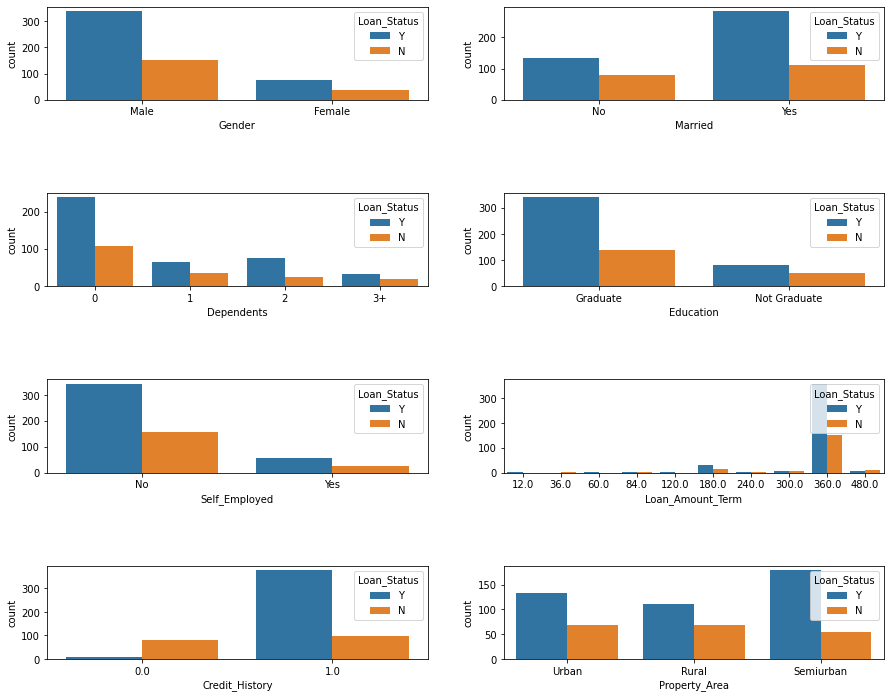

In [8]:
fig, axes = plt.subplots(4,2,figsize=(15,12))
for indx, cat_col in enumerate(categorical_columns):
  row, col = indx//2, indx%2
  sns.countplot(x=cat_col, data=data, hue='Loan_Status', ax=axes[row,col])

plt.subplots_adjust(hspace=1)

*Comments based on plots above*
1. Loan Status Aprroval: About 2/3 applicants have been granted loans
2. Sex: Male is more likely to be granted loans
3. Marital Status: Nearly 2/3 of the applicants are married and married applicants tend to be granted loans
4. Dependents: The majority of applicants have 0 dependents and they are more likely to be accepted the loans
5. Education: About 5/6 population are graduated and Graduates would have higher loan approval
6. Employment: About 5/6 applicants are not self-employed
7. Loan Amount Term: The majority of the loans taken are 360 months
8. Credit History: Applicants with credit history are much more likly to be accepted
9. Property Area: Applicants from Semi-urban tend to be more accepted than 2 other areas

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000




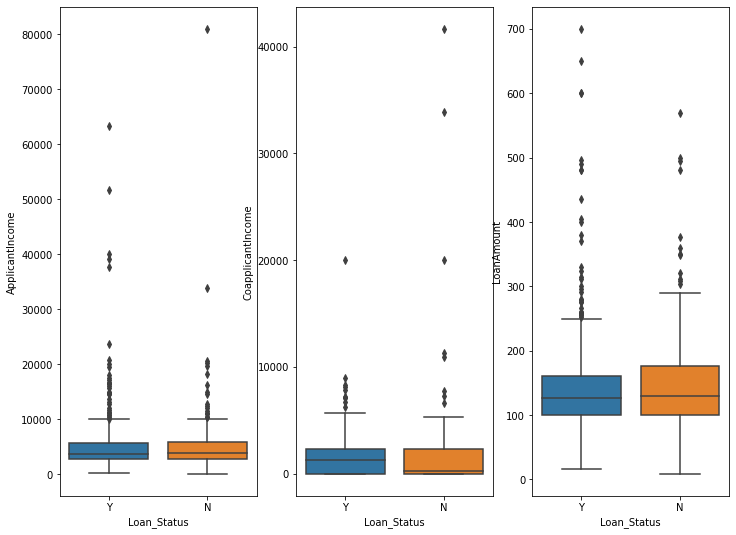

In [9]:
fig, axes = plt.subplots(1,3,figsize=(12,9))
for idx, cat_col in enumerate(numerical_columns):
  sns.boxplot(y=cat_col, data=data, x='Loan_Status', ax=axes[idx])

print(data[numerical_columns].describe())
print('\n')

plt.subplots_adjust(hspace=1)

# Preprocess data

In [10]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [11]:
X = data_encoded.drop(columns='Loan_Status_Y')
y = data_encoded['Loan_Status_Y']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state =42)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

# 1st Model - Decision Tree Classifier

In [12]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6611374346240111
Validation Mean Accuracy:  0.7108225108225109


*Comments:*
Training Accuracy > Test Accuracy --> overfitting

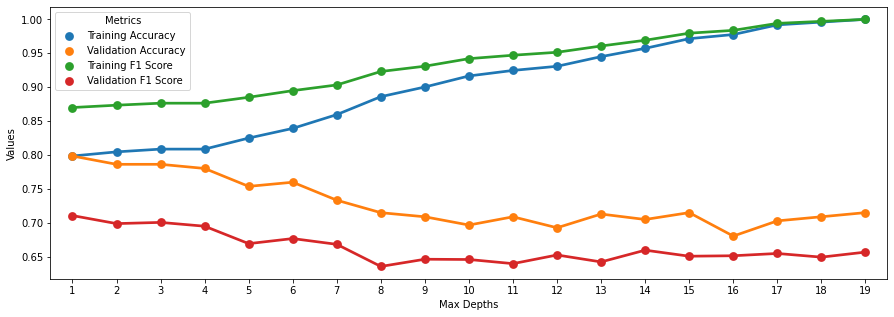

In [13]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
  tree_clf = DecisionTreeClassifier(max_depth=depth)
  tree_clf.fit(X_train, y_train)
  y_training_pred = tree_clf.predict(X_train)

  train_acc = accuracy_score(y_train, y_training_pred)
  train_f1 = f1_score(y_train, y_training_pred)
  val_mean_f1 = cross_val_score(tree_clf, X_train, y_train, scoring='f1_macro').mean()
  val_mean_accuracy = cross_val_score(tree_clf, X_train, y_train, scoring='accuracy').mean()

  training_accuracy.append(train_acc)
  val_accuracy.append(val_mean_accuracy)
  training_f1.append(train_f1)
  val_f1.append(val_mean_f1)
  tree_depths.append(depth)
  
Labels = {'Training Accuracy': training_accuracy, 'Validation Accuracy': val_accuracy, 'Training F1 Score': training_f1, 'Validation F1 Score': val_f1, 'Max Depths': tree_depths}
Labels_df = pd.DataFrame.from_dict(Labels)

plot_df = Labels_df.melt('Max Depths', var_name='Metrics', value_name="Values")
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x='Max Depths', y='Values', hue='Metrics', data=plot_df, ax=ax)

*Comments:*
As can be seen from the graph, when choosing max depths = 3, it provides the best Training Accuracy (~ 0.81) and Validation Accuracy (~ 0.83)

**Visulize the Decision Tree with Max Depth = 3**

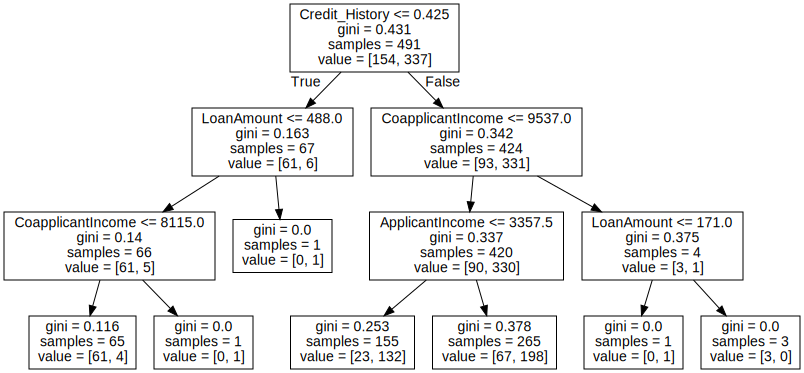

In [14]:
tree_clf = tree.DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(tree_clf, feature_names=X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

*Comments:*
Some leaves have less than or equal 3 samples --> overfitting

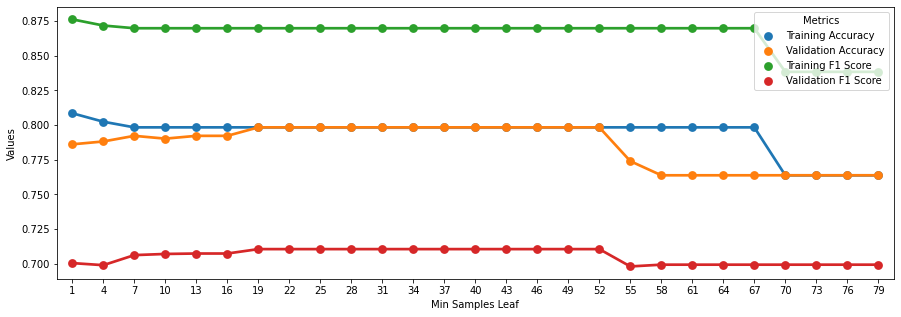

In [15]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1, 80, 3):
  tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=samples_leaf)
  tree_clf.fit(X_train, y_train)
  y_training_pred = tree_clf.predict(X_train)

  training_acc = accuracy_score(y_train, y_training_pred)
  train_f1 = f1_score(y_train, y_training_pred)
  val_mean_accuracy = cross_val_score(tree_clf, X_train, y_train, scoring='accuracy').mean()
  val_mean_f1 = cross_val_score(tree_clf, X_train, y_train, scoring='f1_macro').mean()

  training_accuracy.append(training_acc)
  training_f1.append(train_f1)
  val_accuracy.append(val_mean_accuracy)
  val_f1.append(val_mean_f1)
  min_samples_leaf.append(samples_leaf)

Labels_1 = {'Training Accuracy': training_accuracy, 'Validation Accuracy': val_accuracy, 'Training F1 Score': training_f1, 'Validation F1 Score': val_f1, 'Min Samples Leaf': min_samples_leaf}
Labels_1_df = pd.DataFrame.from_dict(Labels_1)

plot_df = Labels_1_df.melt('Min Samples Leaf', var_name='Metrics', value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min Samples Leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

*Comments:*
choose Min Samples Leaf = 34 --> would provide the best test accuracy

In [16]:
tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=34)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test_imp)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Test F1 Score:', f1_score(y_test, y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy: 0.8536585365853658
Test F1 Score: 0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


*Comments:*
As can be seen from the table, mis-classification happens because of Loan Rejected applicants being recorded as Accepted

# 2nd Model: Random Forest Classifier

In [17]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_train)
print('Train Accuracy:', accuracy_score(y_train, y_pred))
print('Train F1 Score:', f1_score(y_train, y_pred))

print('Validation Accuracy:', cross_val_score(rf_clf, X_train, y_train, scoring='accuracy').mean())
print('Validation F1 Score:', cross_val_score(rf_clf, X_train, y_train, scoring='f1_macro').mean())

Train Accuracy: 0.7983706720977597
Train F1 Score: 0.8699080157687253
Validation Accuracy: 0.79428983714698
Validation F1 Score: 0.7105036634489533


In [18]:
# Random Forest: Test Data Evaluation
y_pred = rf_clf.predict(X_test_imp)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Test F1 Score:', f1_score(y_test, y_pred))

print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy: 0.8536585365853658
Test F1 Score: 0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


*Comments:* Random Forest gives the same result as Decision Tree does.

# 3rd Model: Logistic Regression

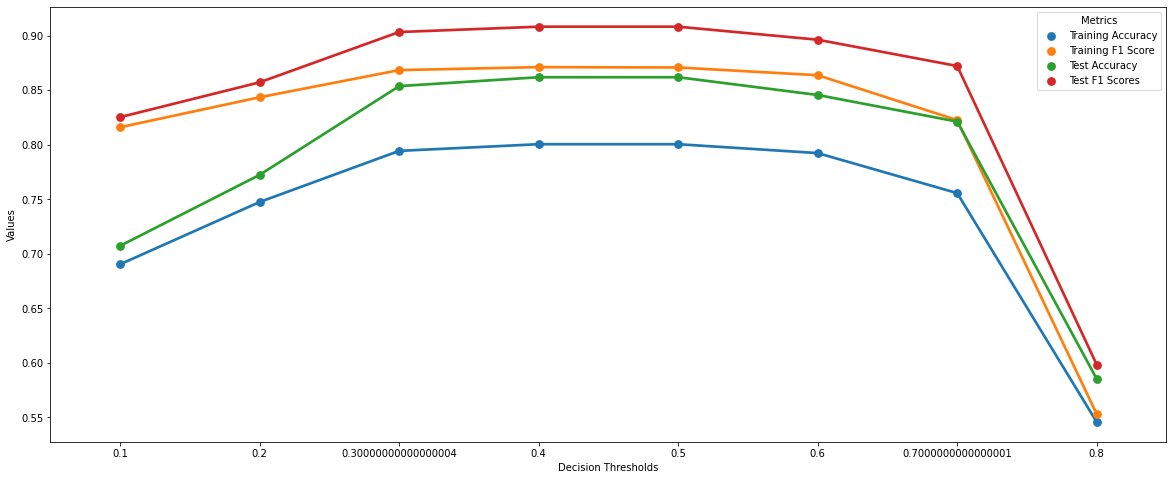

In [19]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

for thresh in np.arange(0.1, 0.9, 0.1):
  lg_clf = LogisticRegression(solver='liblinear')
  lg_clf.fit(X_train, y_train)

  y_pred_train_thresh = lg_clf.predict_proba(X_train)[:,1]
  y_pred_train = (y_pred_train_thresh > thresh).astype(int)

  train_acc = accuracy_score(y_train, y_pred_train)
  train_f1 = f1_score(y_train, y_pred_train)
  
  y_pred_test_thresh = lg_clf.predict_proba(X_test_imp)[:,1]
  y_pred_test = (y_pred_test_thresh > thresh).astype(int)

  test_acc = accuracy_score(y_test, y_pred_test)
  test_f1 = f1_score(y_test, y_pred_test)

  train_accuracies.append(train_acc)
  train_f1_scores.append(train_f1)
  test_accuracies.append(test_acc)
  test_f1_scores.append(test_f1)
  thresholds.append(thresh)
  
Thresholds_lg = {'Training Accuracy': train_accuracies, 'Training F1 Score': train_f1_scores, 'Test Accuracy': test_accuracies, 'Test F1 Scores': test_f1_scores, "Decision Thresholds": thresholds}
Thresholds_lg_df = pd.DataFrame.from_dict(Thresholds_lg)

plot_df = Thresholds_lg_df.melt('Decision Thresholds', var_name='Metrics', value_name='Values')
fig, ax = plt.subplots(figsize=(20,8))
sns.pointplot(x='Decision Thresholds', y='Values', hue='Metrics', data=plot_df, ax=ax)

*Conclusion:* 

The Logistic Regression expresses better result than two other models which are Decision Tree and Random Forest.

Based on the graph above, we can keep the thresholds to 0.4-0.5 which gives the high test accuracy.

In [20]:
thresh = 0.4
y_pred_test_thresh = lg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Test F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix on Test Data')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy: 0.8617886178861789
Test F1 Score: 0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123
